In [1]:
import random, cirq, string
import numpy as np

from cirq.contrib.svg import SVGCircuit
from cirq import Simulator
#import cirq_google


%matplotlib inline

In [2]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4,5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


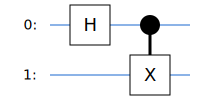

In [3]:
circuit = cirq.Circuit(cirq.H(q0),cirq.CNOT(q0, q1))
#circuit = cirq.Circuit(cirq.H(q0), cirq.measure(q1))
SVGCircuit(circuit)

In [4]:
qubit_mixture = cirq.wavefunction_partial_trace_as_mixture(
                    cirq.final_wavefunction(circuit), keep_indices=[0])

for probability, case in qubit_mixture:
    print(f'{cirq.dirac_notation(case)} = {probability:.2f} %')
    #print(f'{cirq.dirac_notation(case)} {probability:%}')

|0⟩ = 0.50 %
|1⟩ = 0.50 %


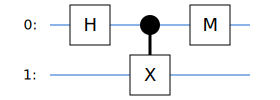

In [5]:
circuit = cirq.Circuit(cirq.H(q0),cirq.CNOT(q0, q1), cirq.measure(q0))
SVGCircuit(circuit)

In [6]:
simulator = Simulator()
result = simulator.run(circuit, repetitions = 15)
print(result)

0=100000000101101


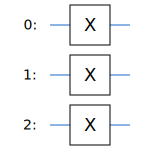

In [7]:
circuit = cirq.Circuit()

circuit.append(cirq.X(q) for q in cirq.LineQubit.range(3))
SVGCircuit(circuit)

In [11]:
q4, q5 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(cirq.X(q4), cirq.measure(q4, key = "result"),
                       cirq.H(q5))

simulator = Simulator()
result = simulator.run(circuit, repetitions = 15)
print(result)

result=111111111111111


In [16]:
output_state_vector = Simulator().simulate(circuit).final_state
output_state_vector

array([0.        +0.j, 0.        +0.j, 0.70710677+0.j, 0.70710677+0.j],
      dtype=complex64)

In [14]:
result = cirq.sample(circuit, repetitions = 100)
print(f"Measurment results:\n{result}")

Measurment results:
result=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
